# EDA trên tập dữ liệu mua sắm tại [siêu thị](https://www.kaggle.com/code/rajatkumar30/eda-online-retail)

## 1. Thống kê mô tả:

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("./Online Retail.csv",encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Nhận xét**
- Tập dữ liệu gồm **541,909** dòng và **8** cột.
- Hầu hết các cột đều đầy đủ dữ liệu, riêng cột **Description** có khoảng 1,454 giá trị thiếu và **CustomerID** có nhiều giá trị thiếu (chỉ có 406,829/541,909 dòng có thông tin khách hàng).
- Các kiểu dữ liệu gồm: số nguyên (`Quantity`), số thực (`UnitPrice`, `CustomerID`), và chuỗi (`InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, `Country`).
- Dữ liệu khá lớn (hơn 33 MB), cần lưu ý khi xử lý và trực quan hóa.
- Việc thiếu dữ liệu ở **CustomerID** và **Description** có thể ảnh hưởng đến các phân tích liên quan đến khách hàng và sản phẩm.

In [74]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Nhận xét**
- **Quantity**: Có giá trị âm (min = -80,995), cho thấy tồn tại các giao dịch trả hàng hoặc lỗi nhập liệu. Giá trị trung bình là 9.55, nhưng độ lệch chuẩn rất lớn (218), thể hiện sự phân tán mạnh.
- **UnitPrice**: Có giá trị âm (min = -11,062), đây là bất thường vì giá sản phẩm không thể âm. Giá trung bình là 4.61, nhưng độ lệch chuẩn cao (96.76), cho thấy có nhiều sản phẩm giá rất cao hoặc dữ liệu bất thường.
- Các giá trị **max** của Quantity và UnitPrice rất lớn, có thể là ngoại lệ hoặc lỗi nhập liệu.
- Cần kiểm tra và xử lý các giá trị âm, ngoại lệ để đảm bảo chất lượng dữ liệu trước khi phân tích sâu hơn.

In [75]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Nhận xét**
- **Description**: Có 1,454 giá trị thiếu, chiếm tỷ lệ nhỏ so với tổng số dòng. Việc thiếu mô tả sản phẩm có thể ảnh hưởng đến các phân tích liên quan đến sản phẩm.
- **CustomerID**: Có 135,080 giá trị thiếu, chiếm khoảng 25% tổng số dòng. Điều này ảnh hưởng lớn đến các phân tích liên quan đến khách hàng, như phân nhóm khách hàng hoặc phân tích hành vi mua sắm.
- Các cột còn lại (**InvoiceNo**, **StockCode**, **Quantity**, **InvoiceDate**, **UnitPrice**, **Country**) đều đầy đủ dữ liệu, không có giá trị thiếu.
- Cần cân nhắc xử lý các giá trị thiếu này (loại bỏ, thay thế, hoặc phân tích riêng biệt) để đảm bảo chất lượng phân tích.

In [76]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**Nhận xét**
- **InvoiceNo**: Có 25,900 giá trị duy nhất, tương ứng với số lượng hóa đơn khác nhau trong tập dữ liệu.
- **StockCode**: Có 4,070 mã sản phẩm khác nhau, thể hiện sự đa dạng về mặt hàng được bán.
- **Description**: Có 4,223 mô tả sản phẩm duy nhất, gần tương đương với số lượng mã sản phẩm.
- **Quantity**: Có 722 giá trị số lượng khác nhau, cho thấy các giao dịch có số lượng mua rất đa dạng.
- **InvoiceDate**: Có 23,260 thời điểm giao dịch khác nhau, phản ánh hoạt động mua bán diễn ra liên tục.
- **UnitPrice**: Có 1,630 mức giá khác nhau cho các sản phẩm, thể hiện sự đa dạng về giá bán.
- **CustomerID**: Có 4,372 khách hàng khác nhau, là cơ sở để phân tích hành vi mua sắm của từng khách hàng.
- **Country**: Có 38 quốc gia khác nhau, cho thấy dữ liệu được thu thập từ nhiều quốc gia.
- Nhìn chung, tập dữ liệu có tính đa dạng cao về sản phẩm, khách hàng, thời gian và địa điểm giao dịch.

## 2. Làm sạch dữ liệu:

Bỏ các dòng không có CustomerID

In [77]:
df = df.dropna(subset=['CustomerID'])

Bỏ hóa đơn bị hủy (InvoiceNo bắt đầu bằng 'C')

In [78]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

Bỏ Quantity hoặc UnitPrice không hợp lệ, loại bỏ top 1% giá trị cao nhất, cách này dữ lại dữ liệu thật, loại bỏ cực trị mà không méo phân phối

In [79]:
# df = df[(df['Quantity'] > 0) & (df['Quantity'] < 2000)]
# df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 1000)]
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)
p_low = df['UnitPrice'].quantile(0.01)
p_high = df['UnitPrice'].quantile(0.99)

df = df[
    (df['Quantity'].between(q_low, q_high)) &
    (df['UnitPrice'].between(p_low, p_high))
]


Chuyển kiểu dữ liệu thời gian

In [80]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Tạo cột mới: Tổng tiền của từng dòng

In [81]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

Thống kê mô tả sau làm sạch

In [82]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,387420.000000,387420,387420.000000,387420.000000,387420.000000
mean,9.758822,2011-07-10 18:51:05.229828096,2.745214,15303.196611,17.827898
min,1.000000,2010-12-01 08:26:00,0.210000,12347.000000,0.210000
25%,2.000000,2011-04-06 14:53:00,1.250000,13975.000000,4.680000
50%,5.000000,2011-07-31 12:52:00,1.950000,15172.000000,11.600000
75%,12.000000,2011-10-20 14:41:00,3.750000,16805.000000,18.960000
max,120.000000,2011-12-09 12:50:00,14.950000,18287.000000,1314.000000
std,14.334699,NaN,2.540683,1709.745784,30.529560


## 3. Trực quan hóa dữ liệu:

### 3.1 Phân phối giá:

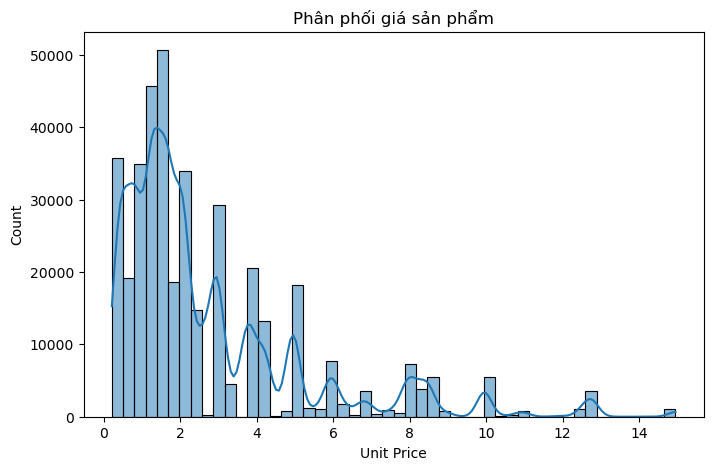

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title("Phân phối giá sản phẩm")
plt.xlabel("Unit Price")
plt.show()


**Nhận xét**
- Biểu đồ cho thấy phần lớn sản phẩm có giá bán từ 0 đến 5 đơn vị tiền tệ, tập trung mạnh ở mức giá thấp.
- Số lượng sản phẩm giảm dần khi giá tăng, thể hiện phân phối lệch phải.
- Có một số mức giá cao hơn (trên 10), nhưng số lượng sản phẩm ở các mức này rất ít, có thể là sản phẩm đặc biệt hoặc ngoại lệ.
- Đường KDE cho thấy xu hướng phân phối giá khá rõ rệt, với nhiều đỉnh nhỏ ở các mức giá phổ biến.
- Kết luận: Đa số sản phẩm trong siêu thị có giá rẻ, chỉ một số ít sản phẩm có giá cao.

### 3.2 Phân phối số lượng:

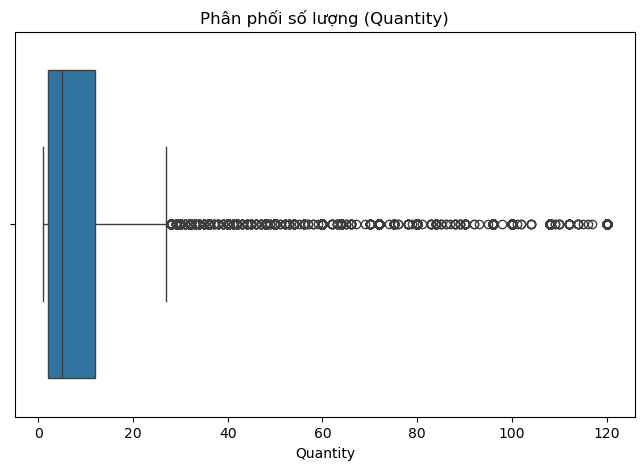

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Quantity'])
plt.title("Phân phối số lượng (Quantity)")
plt.show()

**Nhận xét**
- Biểu đồ boxplot cho thấy phần lớn các giao dịch có số lượng sản phẩm mua nhỏ (đa số nằm dưới 20).
- Có nhiều giá trị ngoại lệ (outlier) với số lượng sản phẩm rất lớn, thể hiện qua các điểm nằm ngoài khoảng whisker của boxplot.
- Phân phối số lượng bị lệch phải, tức là phần lớn giao dịch có số lượng nhỏ, chỉ một số ít giao dịch có số lượng lớn.
- Điều này phản ánh thực tế mua sắm: khách hàng thường mua số lượng ít, chỉ một số trường hợp đặc biệt mới mua số lượng lớn (có thể là bán buôn hoặc lỗi nhập liệu).
- Cần cân nhắc xử lý các giá trị ngoại lệ để đảm bảo chất lượng phân tích tiếp theo.

### 3.3 Biểu đồ top 10 sản phẩm bán nhiều nhất:

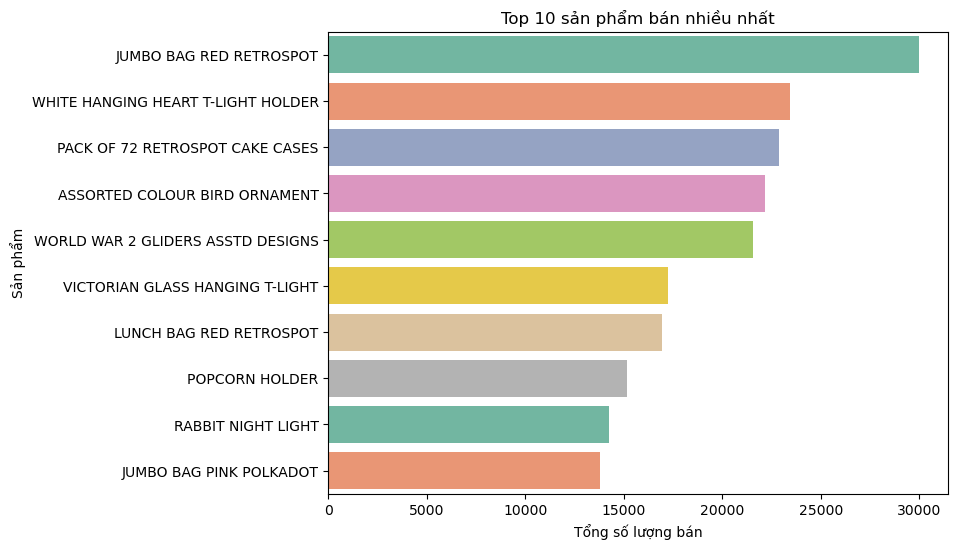

In [85]:
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_products.values,y=top_products.index, hue=top_products.index, palette="Set2", legend=False)
plt.title("Top 10 sản phẩm bán nhiều nhất")
plt.xlabel("Tổng số lượng bán")
plt.ylabel("Sản phẩm")
plt.show()

**Nhận xét**
- Sản phẩm bán chạy nhất là **JUMBO BAG RED RETROSPOT** với số lượng vượt trội so với các sản phẩm còn lại.
- Các sản phẩm tiếp theo như **WHITE HANGING HEART T-LIGHT HOLDER**, **PACK OF 72 RETROSPOT CAKE CASES**, và **ASSORTED COLOUR BIRD ORNAMENT** cũng có số lượng bán rất cao, đều trên 20,000 đơn vị.
- Các sản phẩm trong top 10 chủ yếu là các mặt hàng gia dụng, trang trí và túi xách, cho thấy xu hướng mua sắm tập trung vào các sản phẩm tiện ích và quà tặng.
- Sự chênh lệch giữa sản phẩm bán chạy nhất và các sản phẩm còn lại khá rõ rệt.
- Kết luận: Một số sản phẩm chủ lực chiếm phần lớn doanh số, các sản phẩm này nên được chú trọng trong các chiến dịch marketing và quản lý kho.

### 3.4 Biểu đồ top 10 quốc gia có nhiều giao dịch nhất:

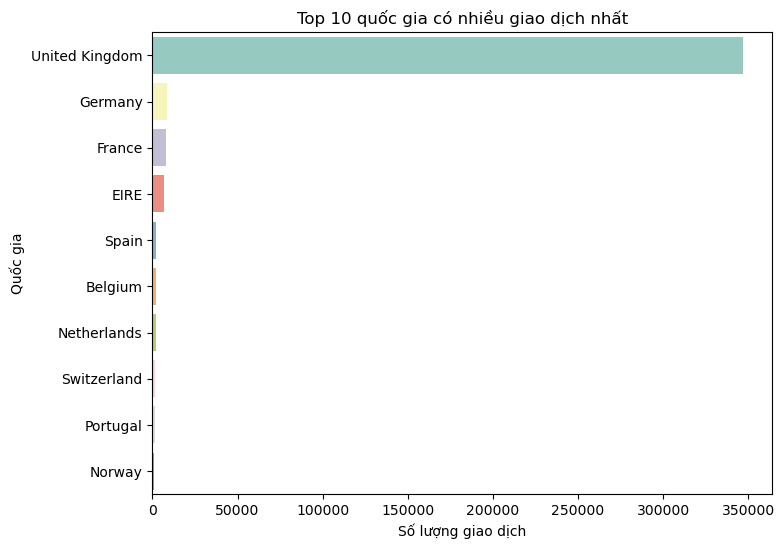

In [86]:
top_countries = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set3", hue=top_countries.index, legend=False)
plt.title("Top 10 quốc gia có nhiều giao dịch nhất")
plt.xlabel("Số lượng giao dịch")
plt.ylabel("Quốc gia")
plt.show()

**Nhận xét**
- Quốc gia có số lượng giao dịch lớn nhất là **United Kingdom**, chiếm áp đảo so với các quốc gia còn lại.
- Các quốc gia tiếp theo như **Germany**, **France**, **EIRE** (Ireland), **Spain**, **Belgium**, **Netherlands**, **Switzerland**, **Portugal** và **Norway** đều có số lượng giao dịch thấp hơn rất nhiều so với Anh.
- Sự chênh lệch giữa United Kingdom và các quốc gia khác rất rõ rệt, cho thấy thị trường chính của siêu thị này là tại Anh.
- Các quốc gia còn lại chỉ chiếm tỷ trọng nhỏ trong tổng số giao dịch.
- Kết luận: Phân tích, chiến lược kinh doanh và marketing nên tập trung vào thị trường Anh, đồng thời có thể xem xét tiềm năng phát triển tại các quốc gia châu Âu khác.

### 3.5 Biểu đồ doanh thu theo tháng:

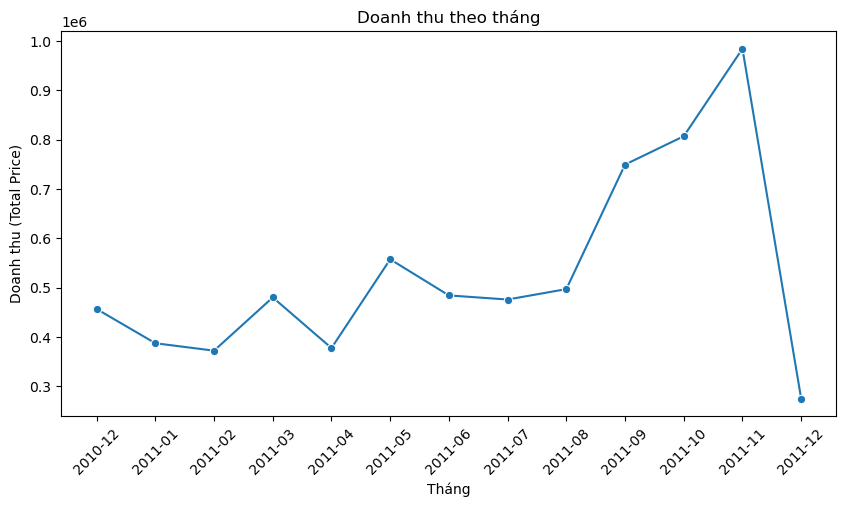

In [87]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
revenue_by_month = df.groupby('Month')['TotalPrice'].sum().reset_index()
revenue_by_month['Month'] = revenue_by_month['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=revenue_by_month, x='Month', y='TotalPrice', marker='o')
plt.title("Doanh thu theo tháng")
plt.xticks(rotation=45)
plt.xlabel("Tháng")
plt.ylabel("Doanh thu (Total Price)")
plt.show()

**Nhận xét**
- Doanh thu của siêu thị có xu hướng tăng mạnh từ tháng 8/2011 đến tháng 11/2011, đạt đỉnh vào tháng 11/2011 với gần 1 triệu đơn vị tiền tệ.
- Các tháng đầu năm 2011 có doanh thu ổn định, dao động quanh mức 400,000 - 500,000.
- Từ tháng 9/2011 trở đi, doanh thu tăng liên tục, có thể do các chương trình khuyến mãi, mùa mua sắm hoặc các yếu tố đặc biệt thúc đẩy tiêu dùng.
- Tháng 12/2011 doanh thu giảm mạnh, có thể do dữ liệu chưa đầy đủ hoặc ảnh hưởng từ các yếu tố mùa vụ.
- Kết luận: Doanh thu có tính mùa vụ rõ rệt, cần tập trung vào các tháng cao điểm để tối ưu hóa hoạt động kinh doanh và marketing.

### 3.6 Biểu đồ ma trận tương quan giữa các biến số:

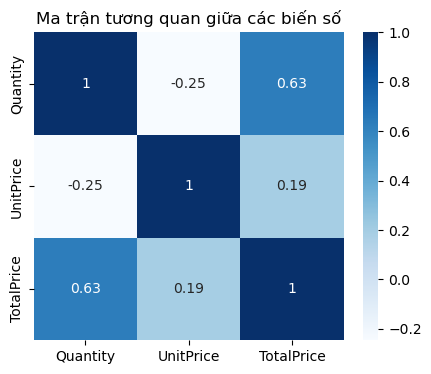

In [88]:
plt.figure(figsize=(5,4))
corr = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

**Nhận xét**
- **Quantity** và **TotalPrice** có tương quan dương mạnh (0.63), nghĩa là số lượng sản phẩm mua càng nhiều thì tổng tiền càng cao.
- **UnitPrice** và **TotalPrice** có tương quan dương yếu (0.19), cho thấy giá sản phẩm cao chỉ ảnh hưởng nhẹ đến tổng tiền của mỗi giao dịch.
- **Quantity** và **UnitPrice** có tương quan âm (-0.25), tức là các giao dịch mua số lượng lớn thường có đơn giá thấp hơn.
- Kết luận: Tổng tiền chủ yếu bị chi phối bởi số lượng sản phẩm, còn đơn giá cao thường đi kèm với số lượng mua thấp.

# Kết thúc